# Análise fatorial com PCA (Principal Components Analysis)
<p>Utiliza-se PCA para reduzir a dimensionalidade dos dados que serão utilizados pela regressão linear</p>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
import numpy as np
from scipy.stats import boxcox
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import Rotator
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Carregamento do dataframe
df = pd.read_csv("../T3/Dataset.csv")
aux = pd.read_csv("../T2/Transform.csv")
columns = ['voto_popular', 'orcamento', 'receita', 'duracao', 'avaliacao_da_critica',
           'total_streaming', 'total_countries', 'total_awards', 'total_nominations', 'oscar_wins', 'total_languages']
df = df[columns]
df.head()

,voto_popular,orcamento,receita,duracao,avaliacao_da_critica,total_streaming,total_countries,total_awards,total_nominations,oscar_wins,total_languages
0,7.756,950.088786,1395.492810,1.761358,0.81,0.0,61.0,4.0,1.0,False,49.0
1,7.663,950.088786,1540.286388,1.740509,0.91,5.0,124.0,2.0,4.0,False,47.0
2,7.300,773.738370,1276.598675,1.734848,0.56,3.0,51.0,0.0,0.0,False,43.0
3,7.038,881.012032,975.649884,1.758172,0.75,3.0,48.0,0.0,1.0,False,41.0
4,7.600,773.738370,1028.316090,1.748879,0.65,8.0,45.0,0.0,1.0,False,41.0


In [4]:
df['oscar_wins'] = df['oscar_wins'].astype(int)
df.head()

,voto_popular,orcamento,receita,duracao,avaliacao_da_critica,total_streaming,total_countries,total_awards,total_nominations,oscar_wins,total_languages
0,7.756,950.088786,1395.492810,1.761358,0.81,0.0,61.0,4.0,1.0,0,49.0
1,7.663,950.088786,1540.286388,1.740509,0.91,5.0,124.0,2.0,4.0,0,47.0
2,7.300,773.738370,1276.598675,1.734848,0.56,3.0,51.0,0.0,0.0,0,43.0
3,7.038,881.012032,975.649884,1.758172,0.75,3.0,48.0,0.0,1.0,0,41.0
4,7.600,773.738370,1028.316090,1.748879,0.65,8.0,45.0,0.0,1.0,0,41.0


## Verificar as suposições para aplicar uma PCA

### Normalidade univariada

In [5]:
#Normalidade
def normalAnalysis(data, column):
    skewness = skew(data[column])
    kurt = kurtosis(data[column], fisher=True)
    return skewness, kurt
def plot(data, column):
    skewness, kurt = normalAnalysis(data, column)
    _, axs = plt.subplots(1, 2, figsize=(14,6))
    sns.histplot(data[column], kde=True, ax=axs[0])
    axs[0].set_title(f'{column} - Histograma\nAssimetria: {skewness:.2f}, Curtose: {kurt:.2f}')
    sm.qqplot(data[column], line='s', ax=axs[1])
    axs[1].set_title(f'{column} - Q-Q Plot')
    plt.tight_layout()
    plt.show()

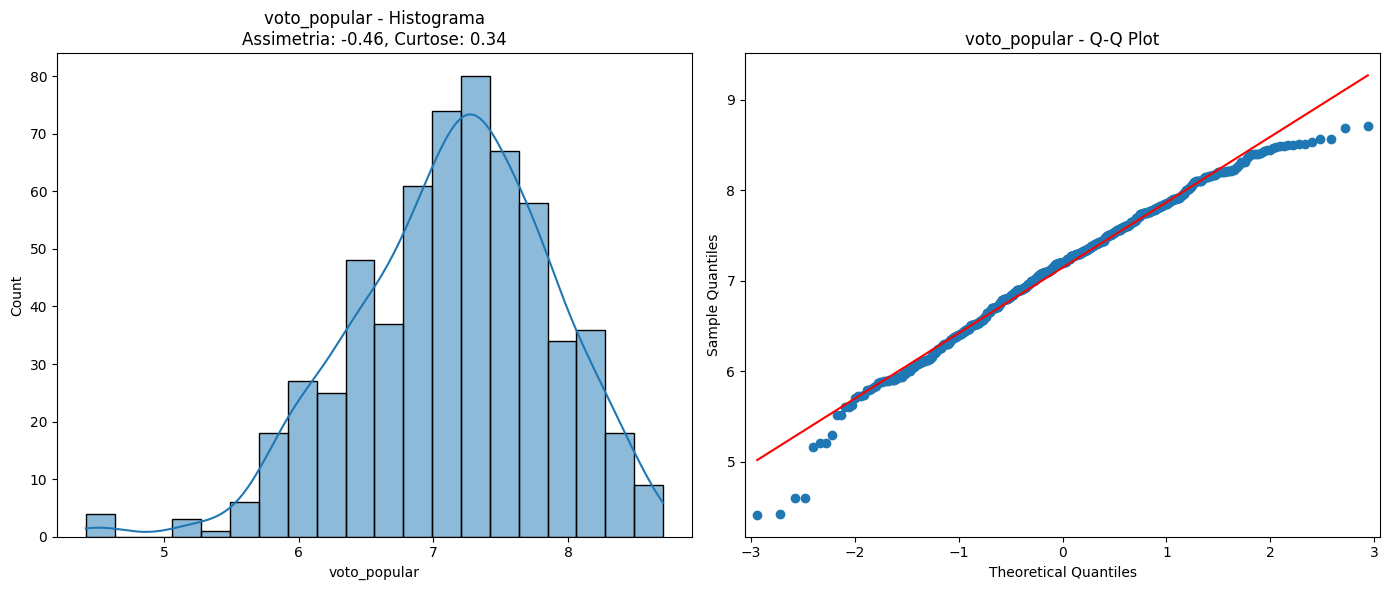

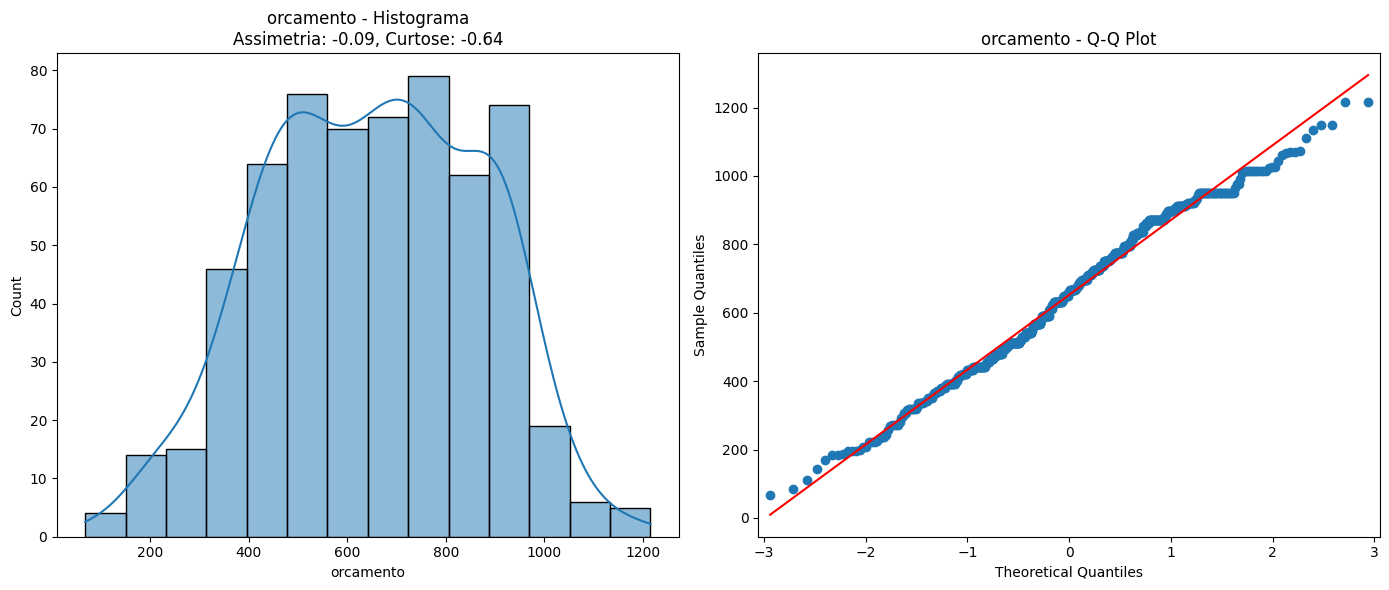

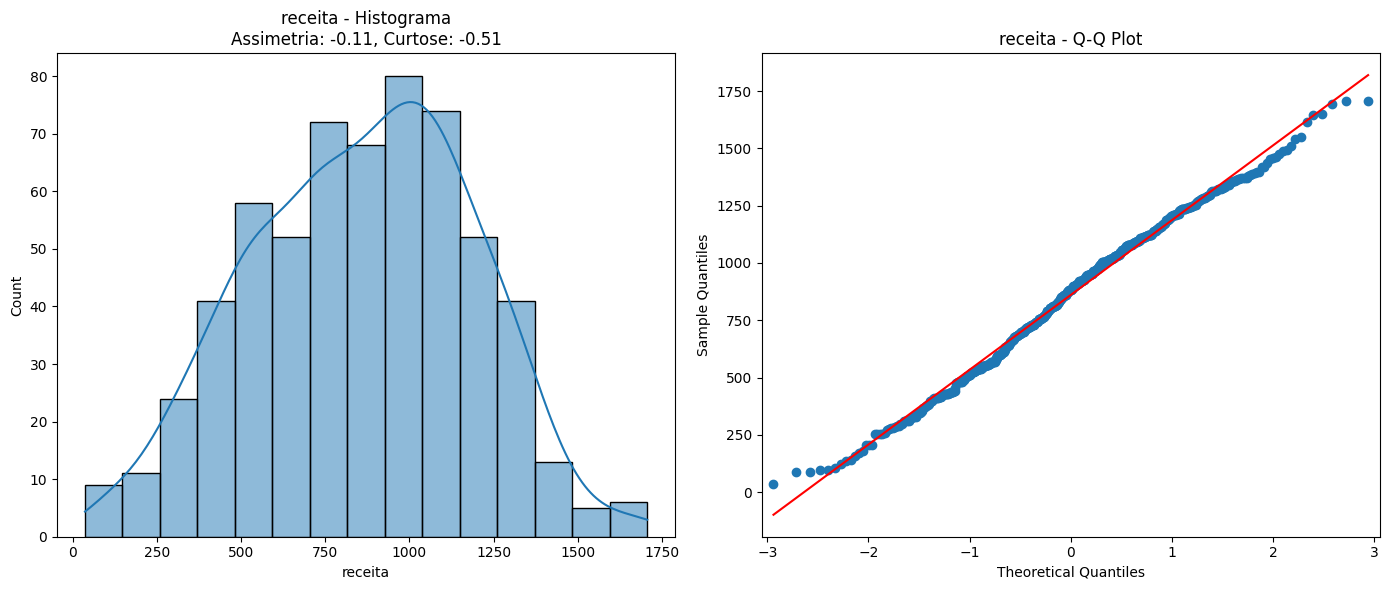

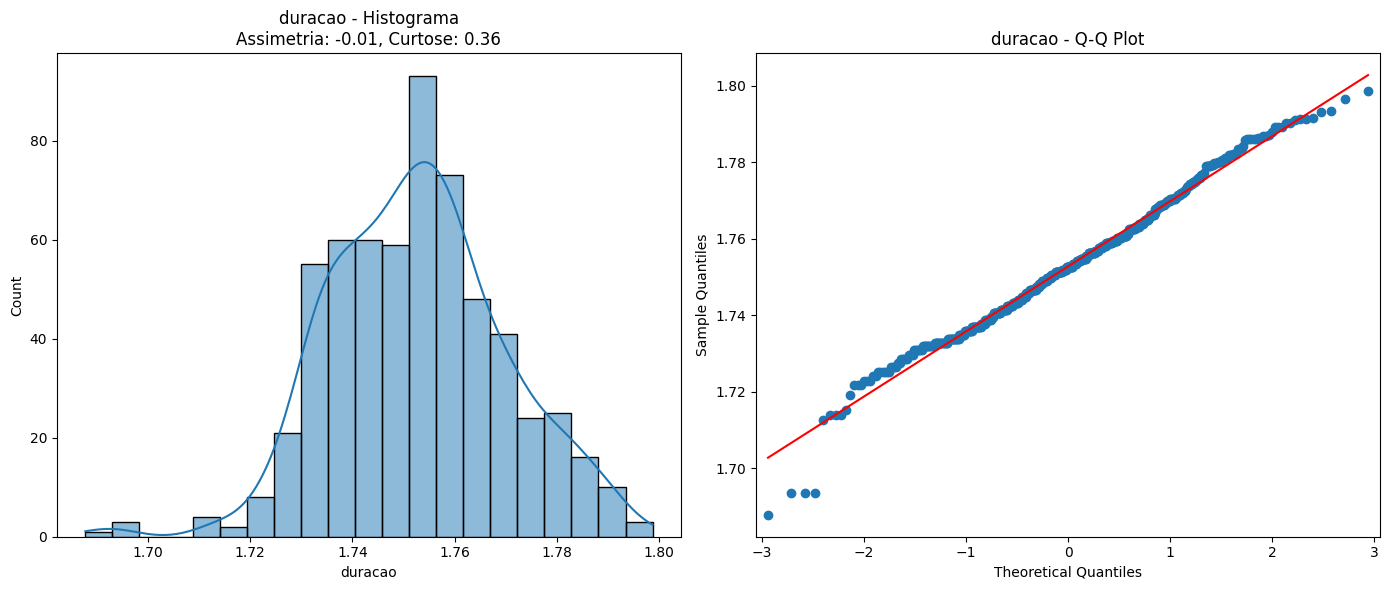

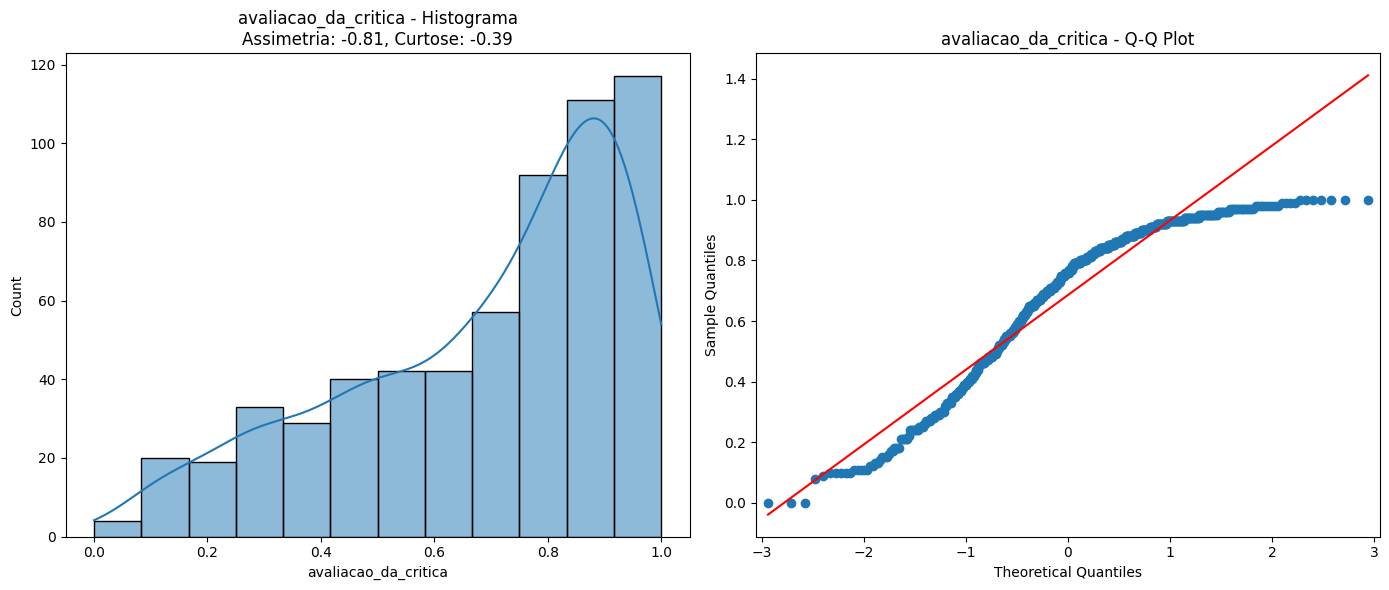

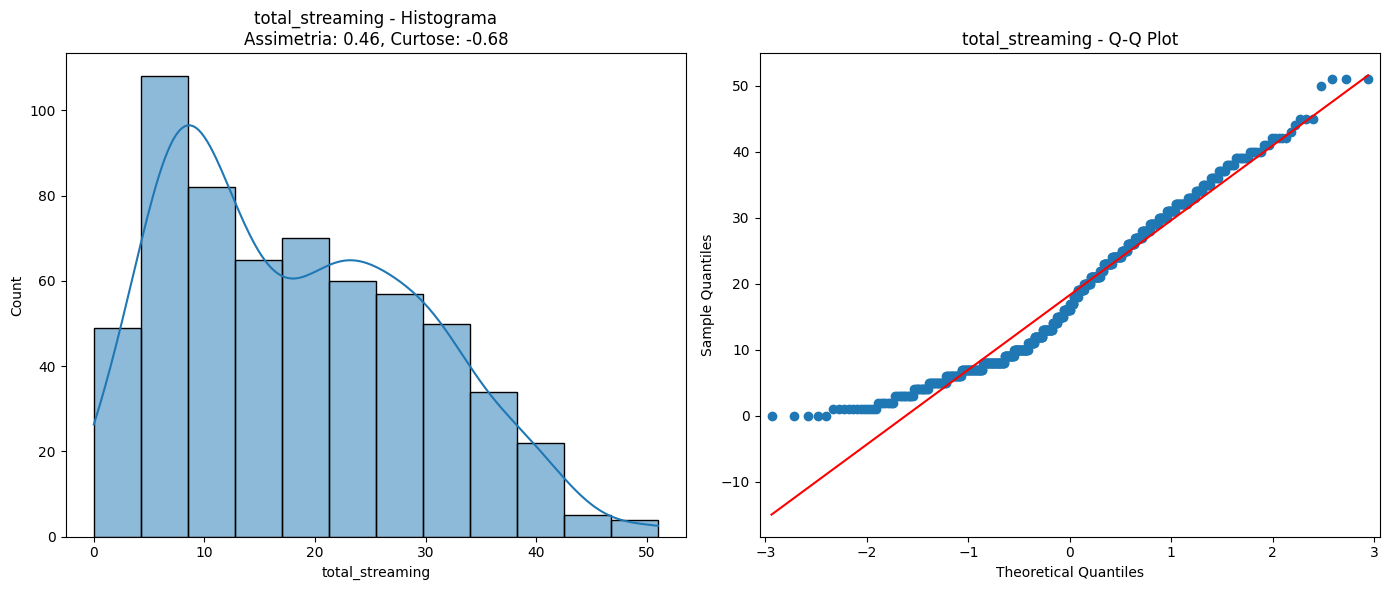

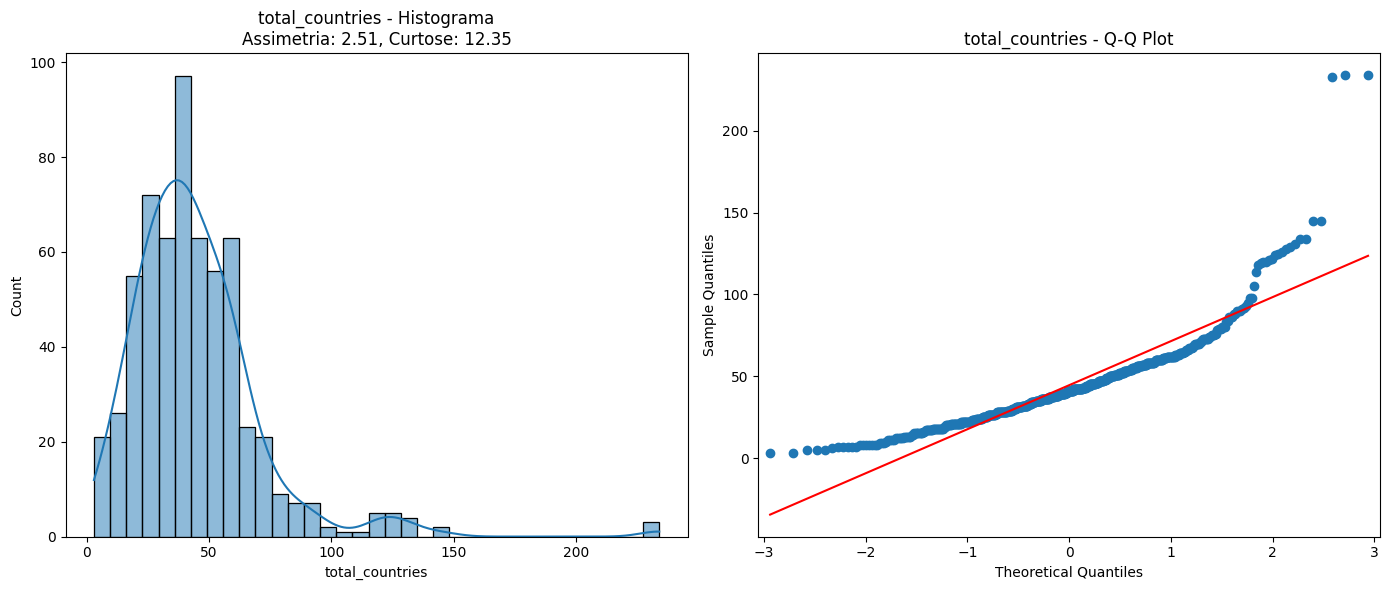

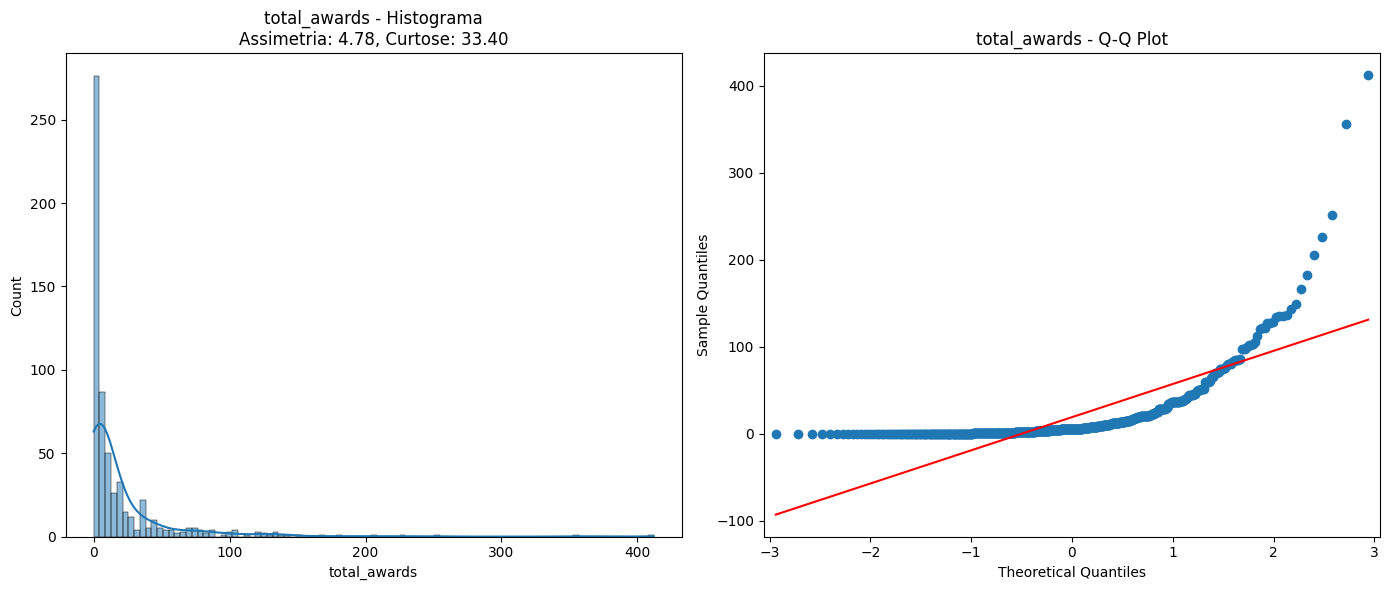

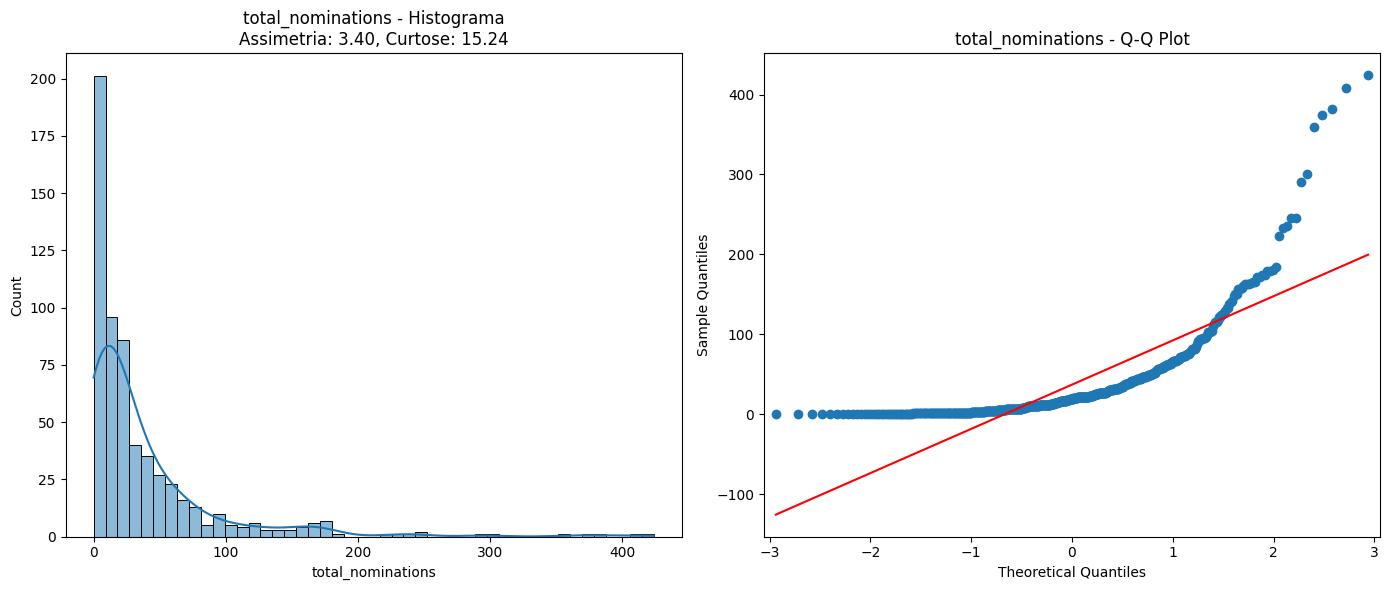

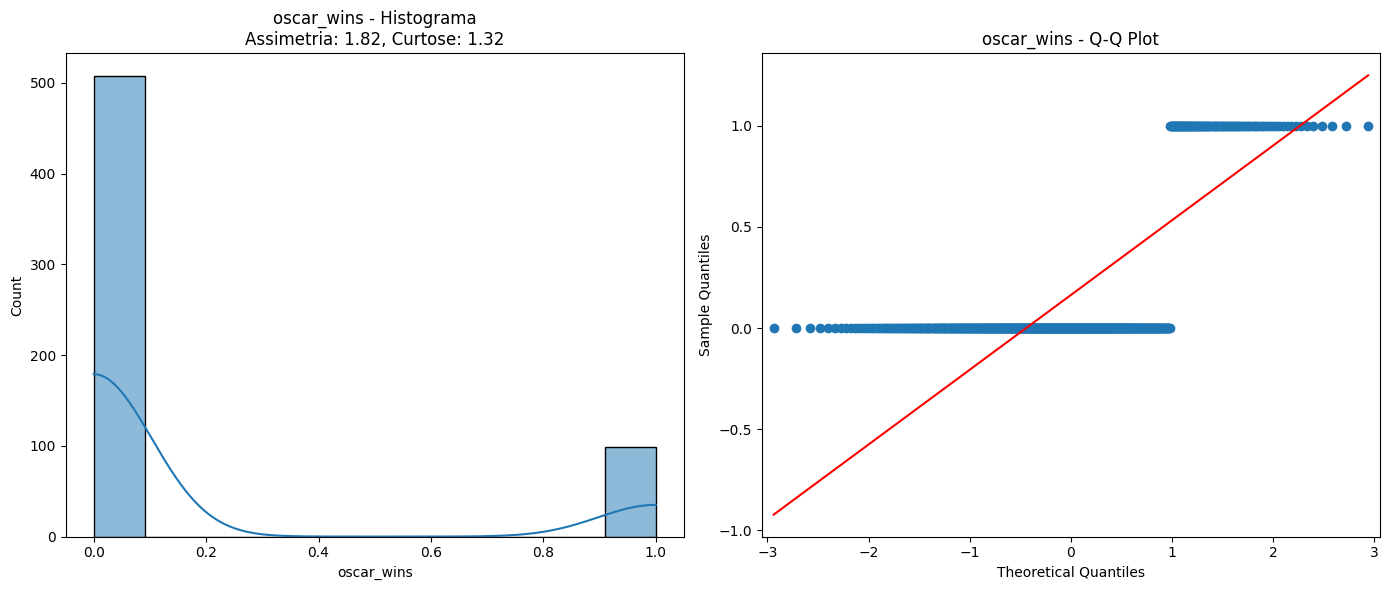

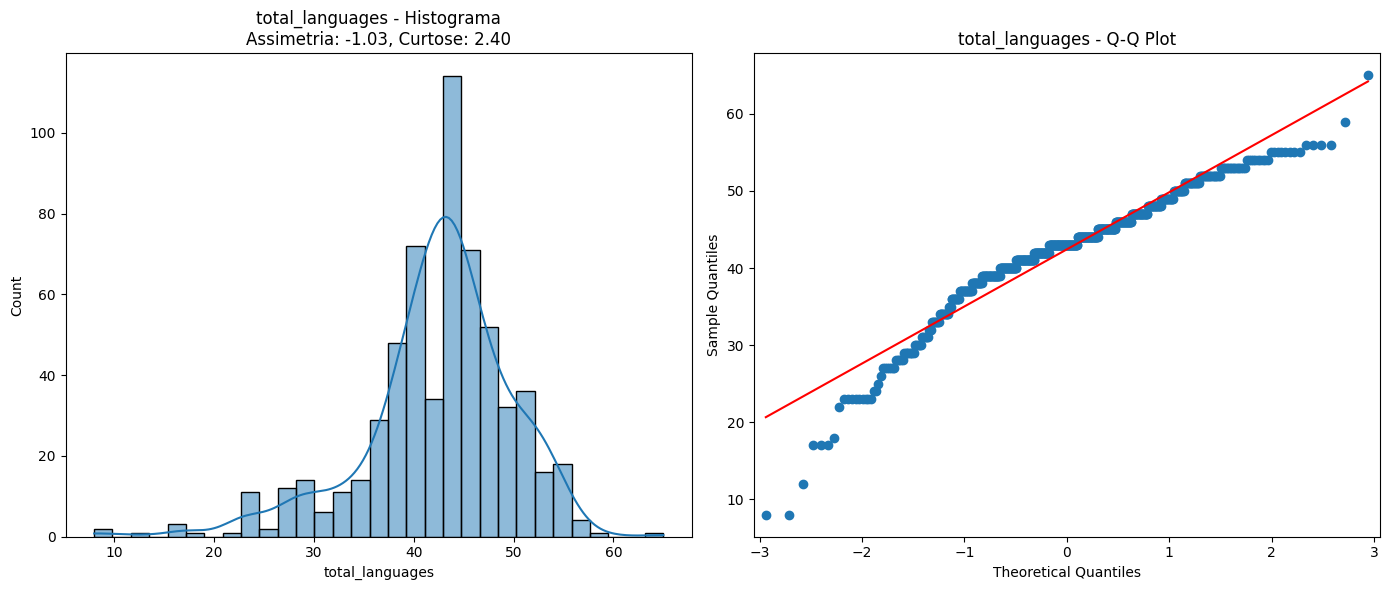

In [6]:
for column in df.columns:
    plot(df, column)

In [7]:
#Transformação das variáveis que não segue distribuição normal
df['total_countries'] = np.log1p(df['total_countries'])
df['total_awards'] = np.log1p(df['total_awards'])
df['total_nominations'] = np.log1p(df['total_nominations'])
df['total_languages'], lamb1 = boxcox(df['total_languages'])

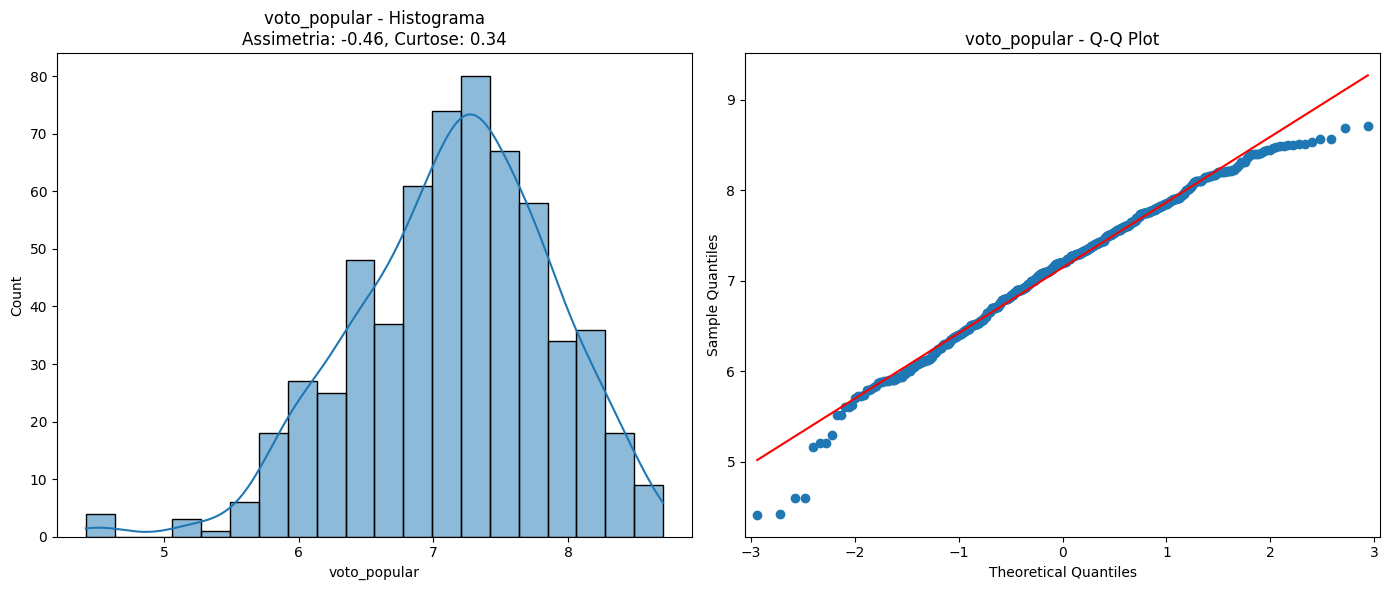

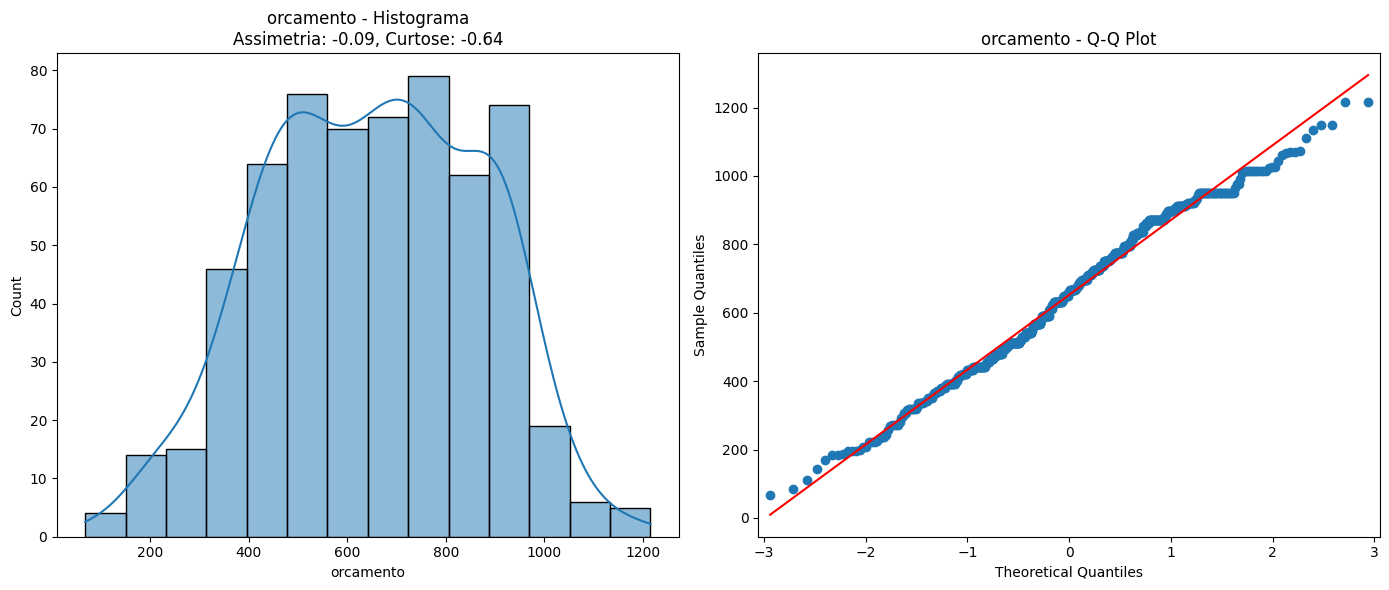

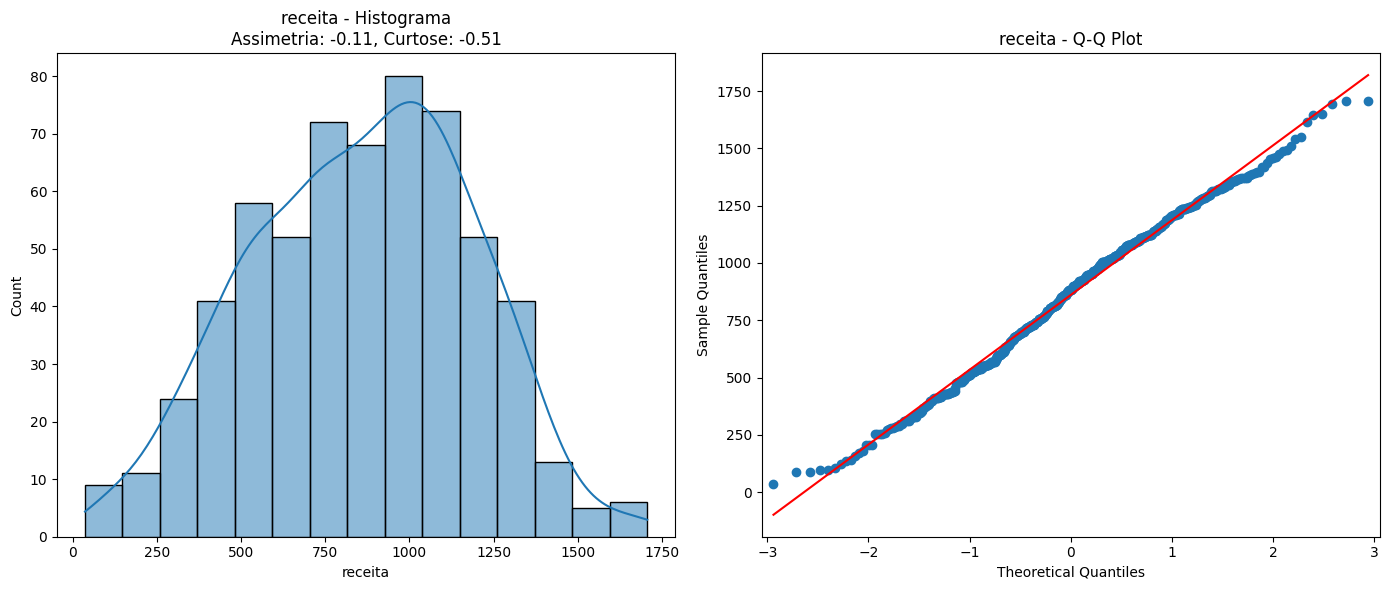

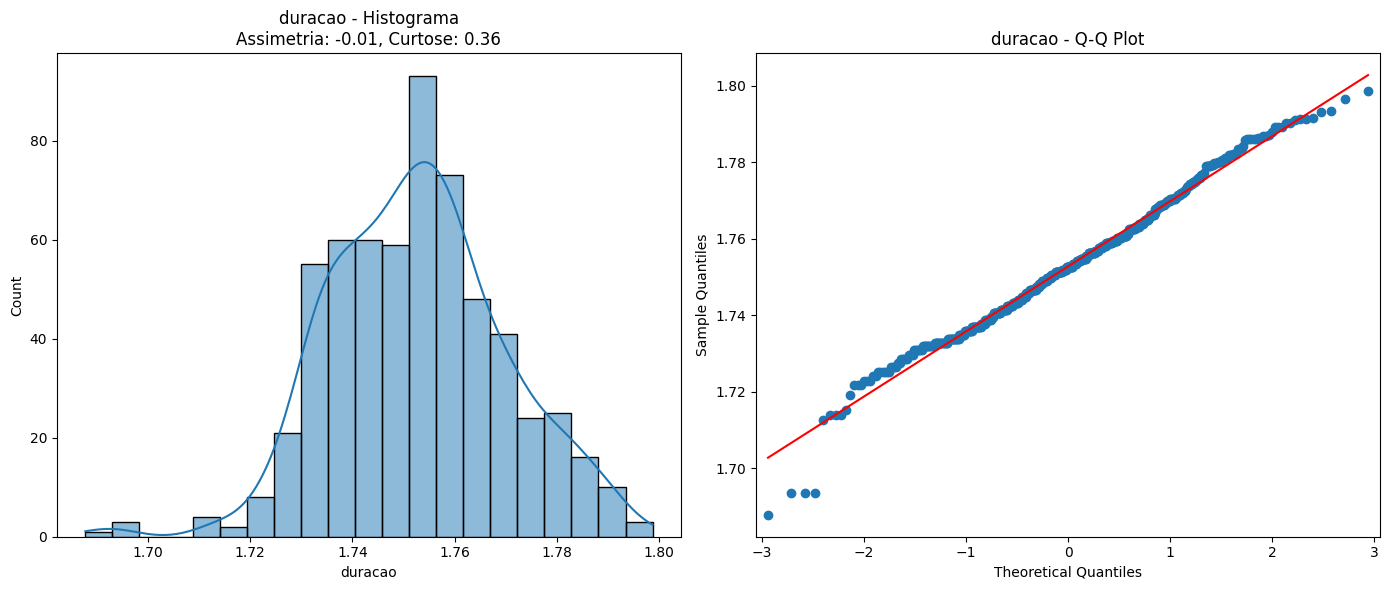

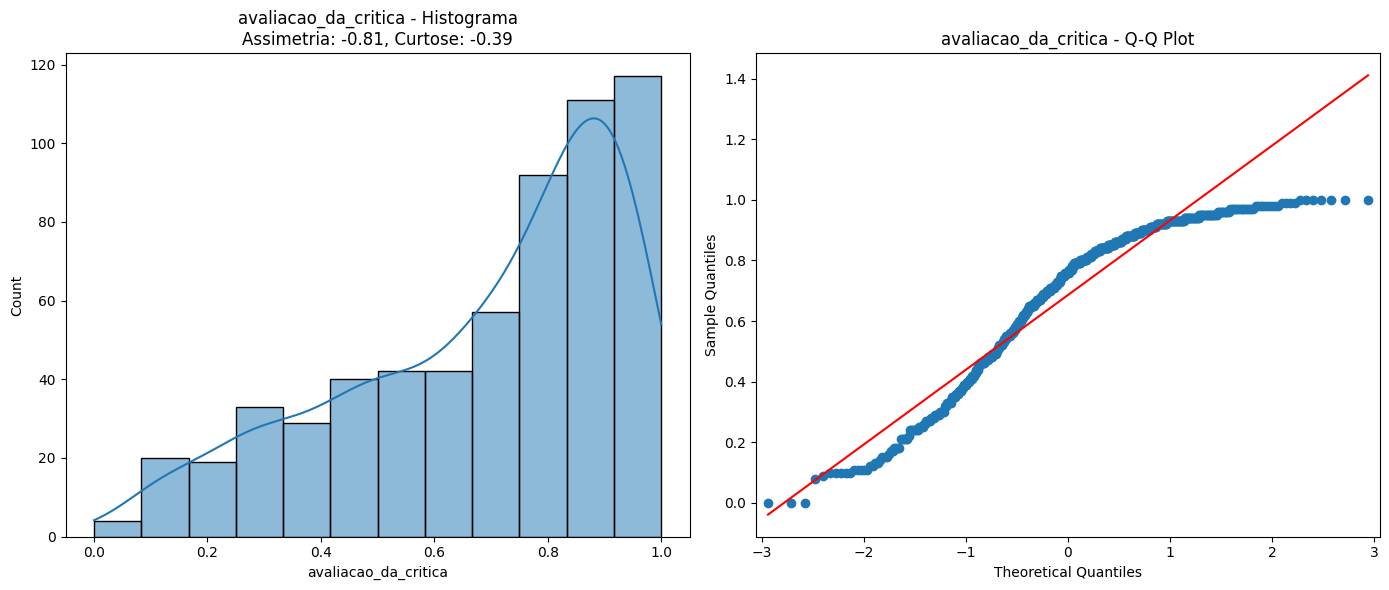

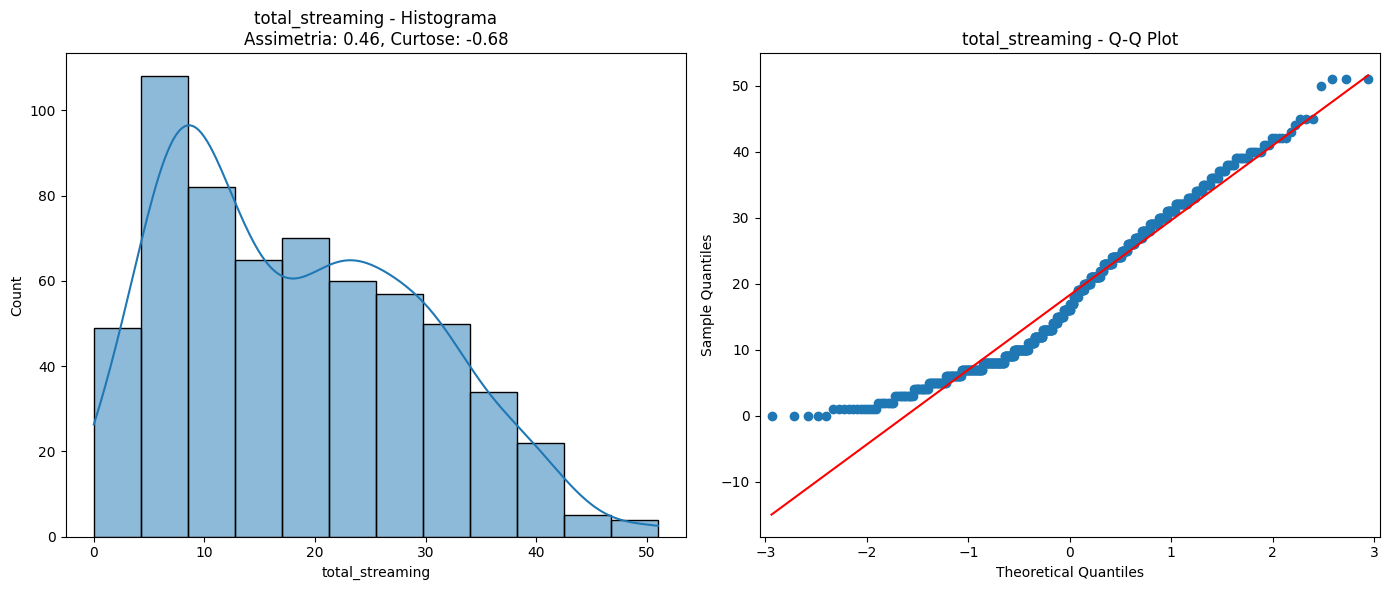

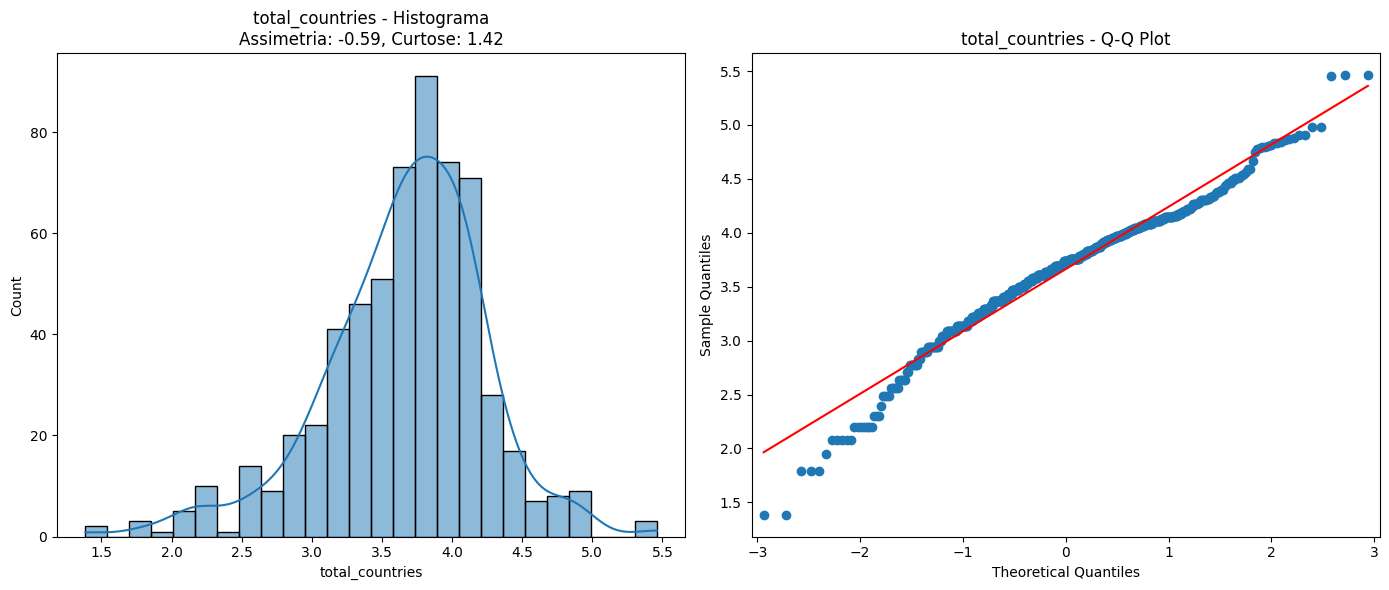

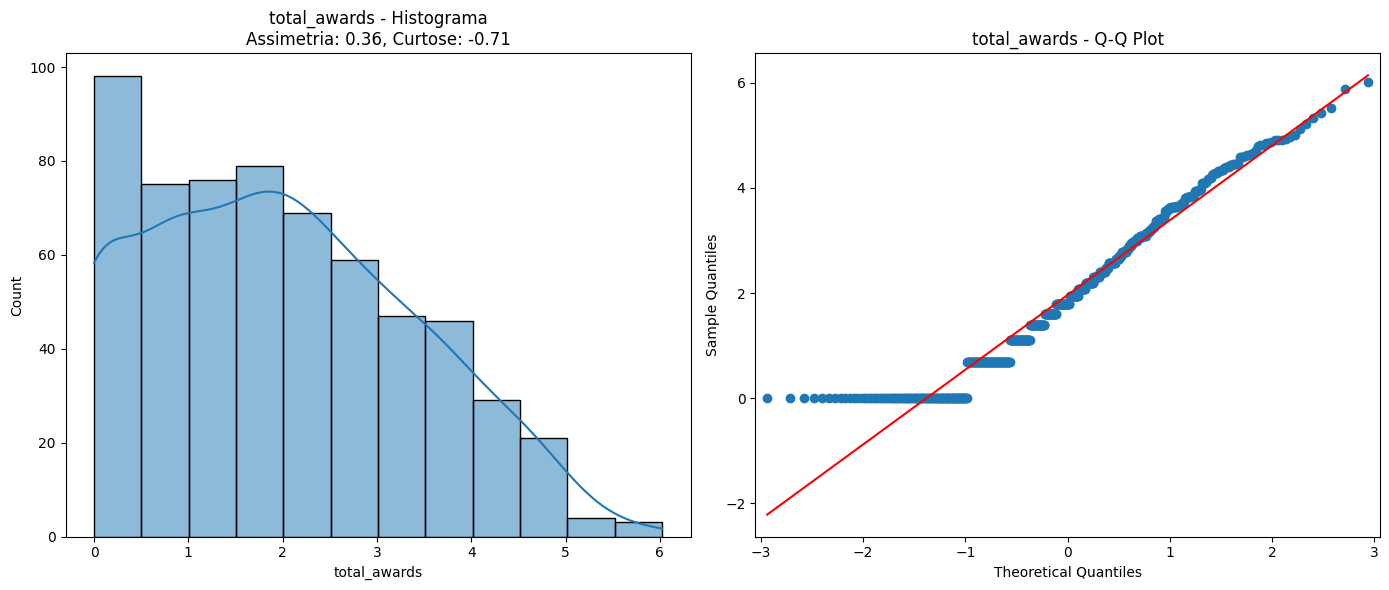

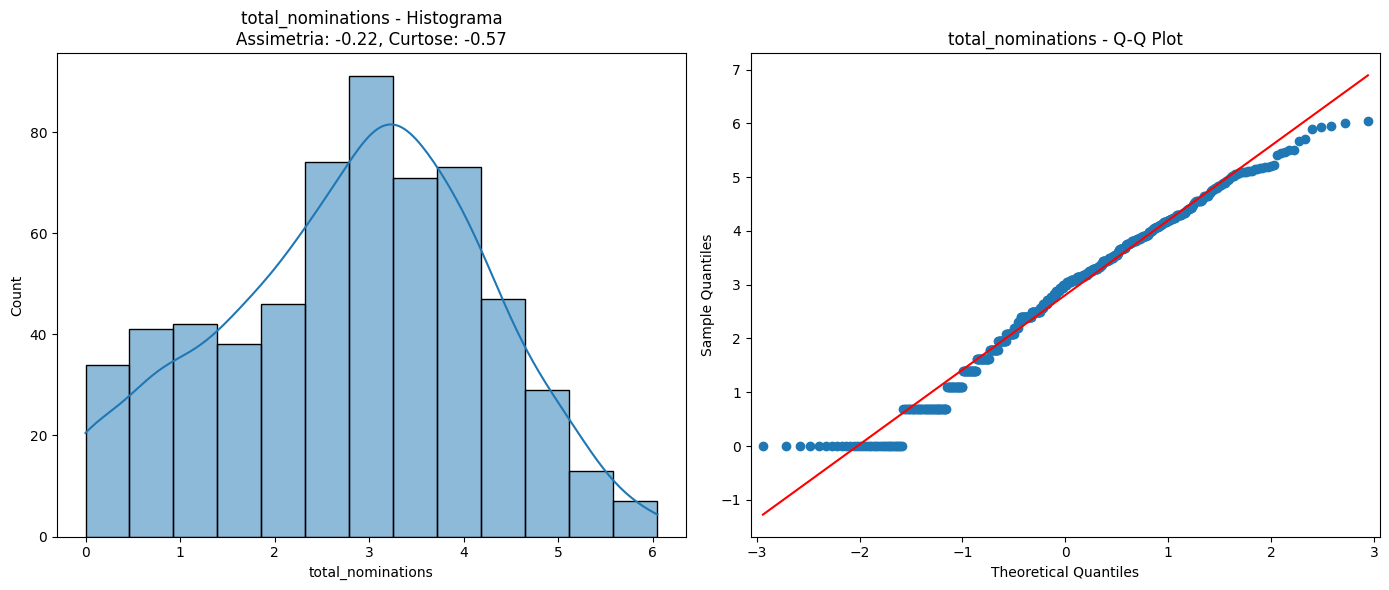

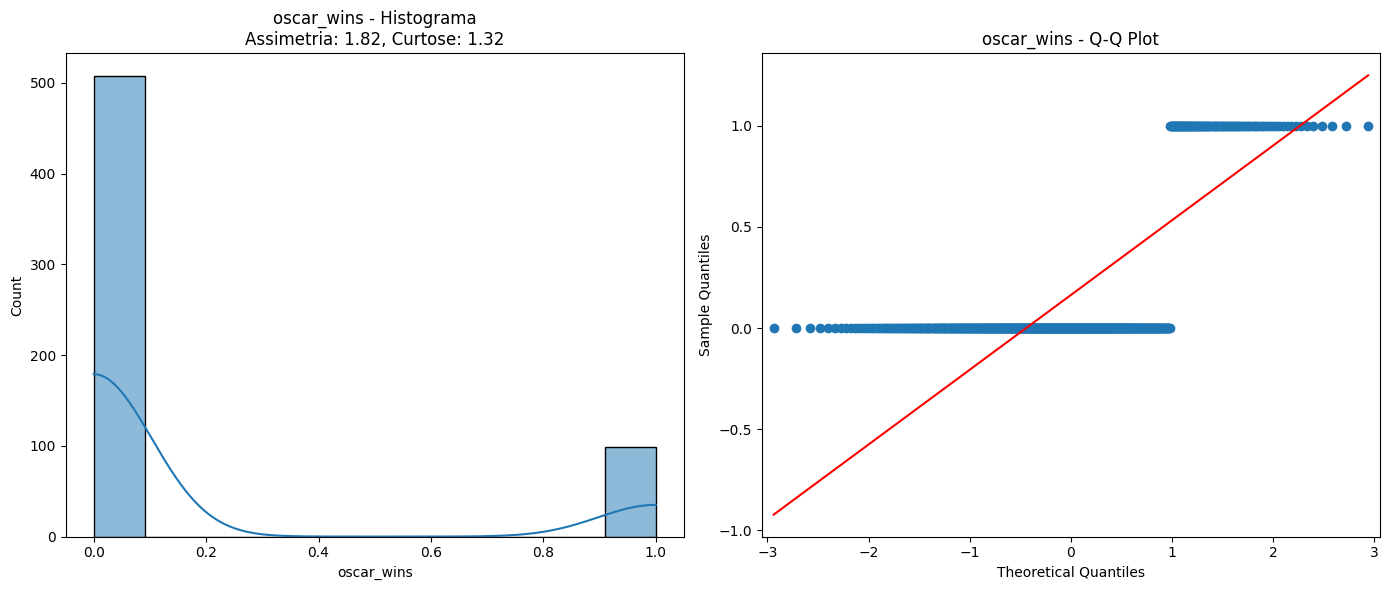

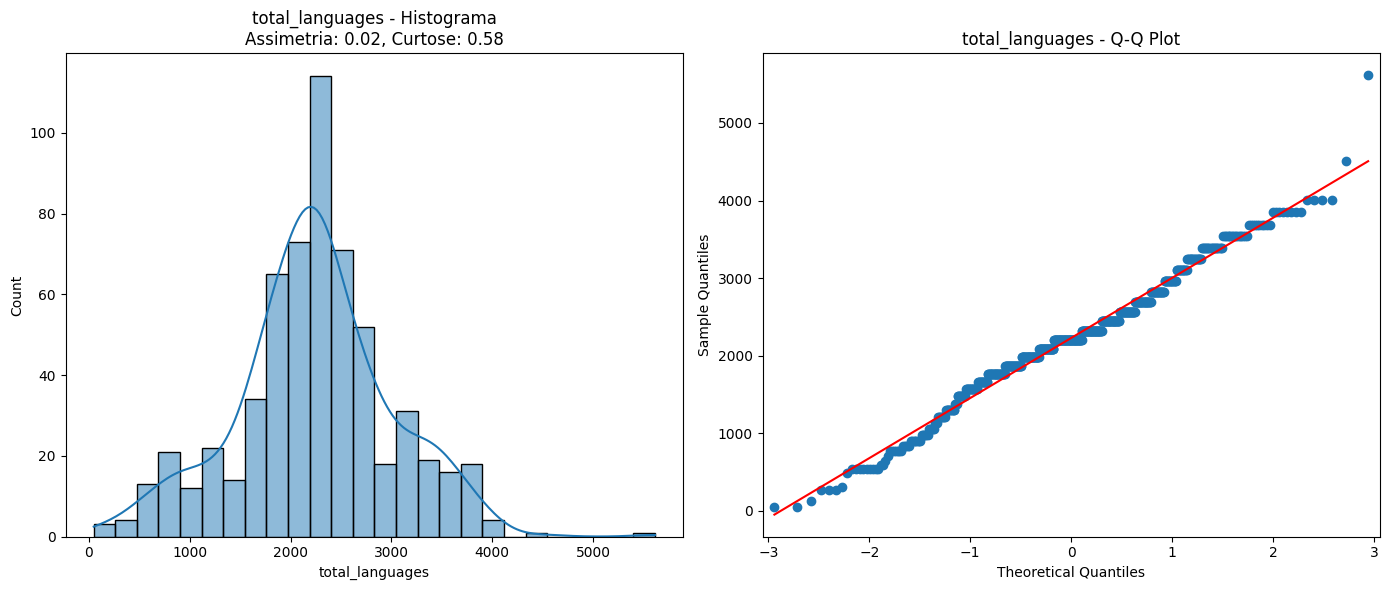

In [8]:
for column in df.columns:
    plot(df, column)

<p>Analisando os gráficos e as métricas de assimetria e curtose, percebe-se que foi atendido a suposição da normalidade</p>

### Viabilidade da Análise Fatorial (KMO e MSA)

In [9]:
msa, kmo = calculate_kmo(df)
print(f"MSA para cada variável: \n{msa}")
print(f"KMO: {kmo}")

MSA para cada variável: 
[0.79489775 0.66332459 0.8024716  0.84182993 0.74521704 0.64953261
 0.8561229  0.74074202 0.78902662 0.77761627 0.82750345]
KMO: 0.7718048518948403


<p>Como  0.7 < KMO < 0.8, logo há uma correlação boa entre as variáveis do dataset.</p>
<p>Como o MSA de todas as variáveis estão acima de 50%, logo podemos utilizar todas as variáveis para aplicar a análise de PCA</p>


In [10]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df) #Dados padronizados na mesma escala

## Aplicação da PCA

In [11]:
model_pca = PCA()
model_pca.fit(df_scaled)

PCA()

In [12]:
explained_variance = model_pca.explained_variance_ratio_

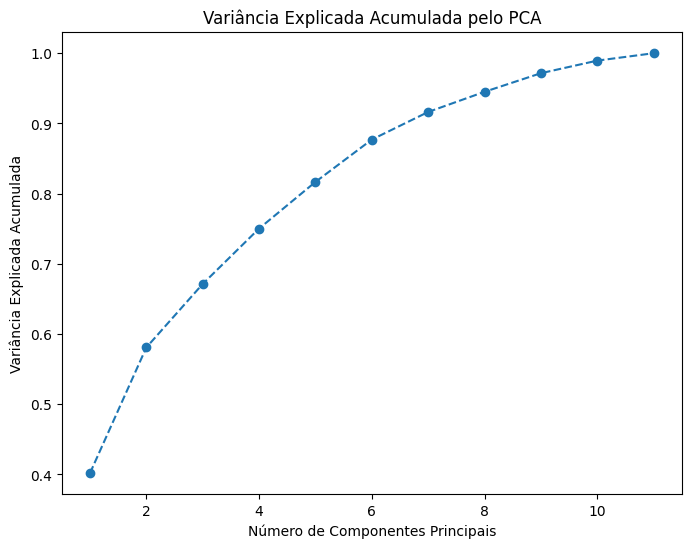

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Variância Explicada Acumulada pelo PCA')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.show()

In [14]:
print("Variância explicada por cada componente:")
print(explained_variance)

Variância explicada por cada componente:
[0.40181736 0.17906064 0.09047223 0.07888149 0.06641145 0.06034164
 0.03932538 0.02871989 0.0264963  0.01792903 0.01054459]


In [15]:
print("Componentes principais (direções dos eixos):")
print(model_pca.components_)

Componentes principais (direções dos eixos):
[[ 2.90302148e-01  2.48288338e-01  3.50284991e-01  2.34825017e-01
   2.46359692e-01  2.04103868e-01  2.85398791e-01  3.86195620e-01
   4.10611822e-01  2.62923690e-01  3.24889599e-01]
 [-3.82107282e-01  4.63171404e-01  3.34095551e-01  5.66400017e-02
  -4.46878400e-01  1.46251248e-01  2.31926859e-01 -2.64230165e-01
  -8.88305202e-02 -2.93312408e-01  2.93288149e-01]
 [ 7.41333354e-02 -3.93387077e-01 -2.02897085e-01 -1.18597465e-01
  -7.89638279e-02  8.21610879e-01 -2.38823374e-02 -2.61502186e-02
  -2.03456878e-02 -1.49577943e-01  2.81419330e-01]
 [ 3.77550388e-02  2.93351647e-02 -2.07808704e-02  8.48446866e-01
  -1.94527502e-01  1.78958981e-01 -3.58926193e-01  5.34871889e-02
  -3.34440315e-02 -6.45860749e-02 -2.65657777e-01]
 [-3.80954310e-01 -1.57774767e-01 -1.14227896e-02 -6.06515983e-02
  -4.69900400e-01  5.43536545e-02  6.84854385e-03  2.22061729e-01
  -2.79503545e-03  7.43122314e-01 -2.85347981e-02]
 [ 1.87317954e-01 -1.80578501e-01 -2.851

<p>Utilizando o critério de variância acumulada, deseja-se obter componentes que explicam pelo menos 80% da variância original.</p>
<p>Logo, analisando o gráfico, escolhe-se 5 componetes principais para obter uma informação de 80% de variância</p>

In [16]:
components = model_pca.components_[:5, :] #Seleciono os primeiros 5 componentes (80%)

In [17]:
components

array([[ 0.29030215,  0.24828834,  0.35028499,  0.23482502,  0.24635969,
         0.20410387,  0.28539879,  0.38619562,  0.41061182,  0.26292369,
         0.3248896 ],
       [-0.38210728,  0.4631714 ,  0.33409555,  0.05664   , -0.4468784 ,
         0.14625125,  0.23192686, -0.26423016, -0.08883052, -0.29331241,
         0.29328815],
       [ 0.07413334, -0.39338708, -0.20289708, -0.11859746, -0.07896383,
         0.82161088, -0.02388234, -0.02615022, -0.02034569, -0.14957794,
         0.28141933],
       [ 0.03775504,  0.02933516, -0.02078087,  0.84844687, -0.1945275 ,
         0.17895898, -0.35892619,  0.05348719, -0.03344403, -0.06458607,
        -0.26565778],
       [-0.38095431, -0.15777477, -0.01142279, -0.0606516 , -0.4699004 ,
         0.05435365,  0.00684854,  0.22206173, -0.00279504,  0.74312231,
        -0.0285348 ]])

In [18]:
components_transpost = components.T
rotator = Rotator(method='Varimax') #Rotação Varimax
rotated_loadings = rotator.fit_transform(components_transpost)

In [19]:
print("Cargas fatoriais dos componentes rotacionados:")
print(rotated_loadings)

Cargas fatoriais dos componentes rotacionados:
[[ 4.11635418e-02 -5.81247930e-02  6.52229248e-02  9.40070903e-02
  -6.03460356e-01]
 [-1.20665474e-01  6.40673839e-01 -1.39500174e-01  9.79803680e-02
   5.09715079e-02]
 [ 7.29161086e-02  5.18055281e-01  3.11929090e-02  2.76190183e-02
   2.48016664e-02]
 [ 7.08950134e-02  1.50538288e-01  4.90212557e-02  8.74861562e-01
  -2.19823450e-02]
 [-9.15078541e-04 -2.52419741e-02 -1.21195316e-01 -1.14679878e-01
  -7.04839166e-01]
 [ 2.34923270e-05 -1.56913682e-01  8.58073175e-01  1.02595641e-01
   4.04418925e-02]
 [ 7.47780255e-02  3.67536006e-01  1.18235460e-01 -3.30379758e-01
  -2.97143158e-02]
 [ 4.85316901e-01  2.64454358e-02  5.05657750e-02  7.57124741e-02
  -1.65225997e-01]
 [ 2.67130378e-01  1.97018046e-01  1.02283461e-01  7.68440732e-03
  -2.39452473e-01]
 [ 8.12882806e-01 -8.02636264e-02 -1.12147413e-01 -8.26066378e-02
   2.17520404e-01]
 [ 1.18475792e-02  2.98020121e-01  4.27031898e-01 -2.64525125e-01
  -2.94987671e-02]]


## Variáveis utilizadas na análise fatorial PCA

1. 'voto_popular'
2. 'orcamento' 
3. 'receita'
4. 'duracao'
5. 'avaliacao_da_critica'
6. 'total_streaming'
7. 'total_countries'
8. 'total_awards'
9. 'total_nominations'
10. 'oscar_wins'
11. 'total_languages'


### Componentes principais e suas variáveis associadas:

- **Componente 1**:
  - 'total_awards'
  - 'oscar_wins'

- **Componente 2**:
  - 'orcamento'
  - 'receita'

- **Componente 3**:
  - 'total_streaming'
  - 'total_languages'

- **Componente 4**:
  - 'duracao'

- **Componente 5**:
  - 'voto_popular'
  - 'avaliacao_da_critica'


<p>Analisando os fatores que foram levantados pela Principal Components Analysis, nomea-se os componentes da seguinte forma:</p>

1. Prestígio e Reconhecimento
2. Desempenho Financeiro
3. Exposição e Acessibilidade
4. Duração do Filme
5. Apreciabilidade do Filme


## Utilizando os componentes como inputs de um modelo de regressão linear

In [31]:
X = model_pca.transform(df_scaled)[:, :5]
Y = aux['popularidade']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [33]:
Y_pred = model.predict(X_test)

In [34]:
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
print(f"R²: {r2}")
print(f"MSE: {mse}")

R²: 0.05876846560308058
MSE: 0.00013860909726638656


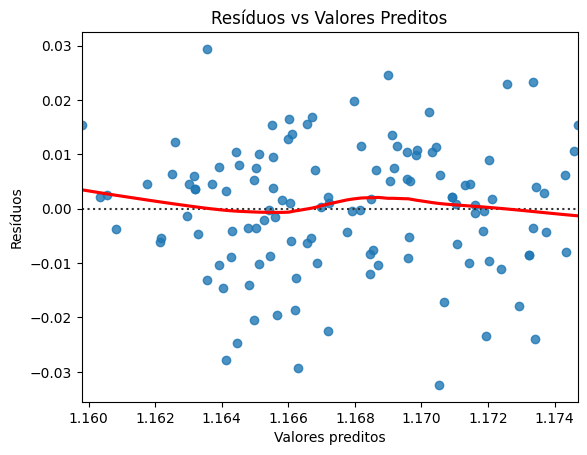

In [36]:
residuos = Y_test - Y_pred
sns.residplot(x=Y_pred, y=residuos, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Valores preditos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Preditos')
plt.show()

In [37]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuos)
print(f'Estatística de Durbin-Watson: {dw_stat}')

Estatística de Durbin-Watson: 2.3020580312392926


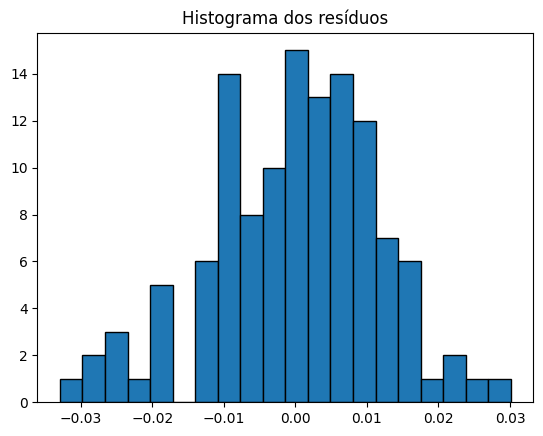

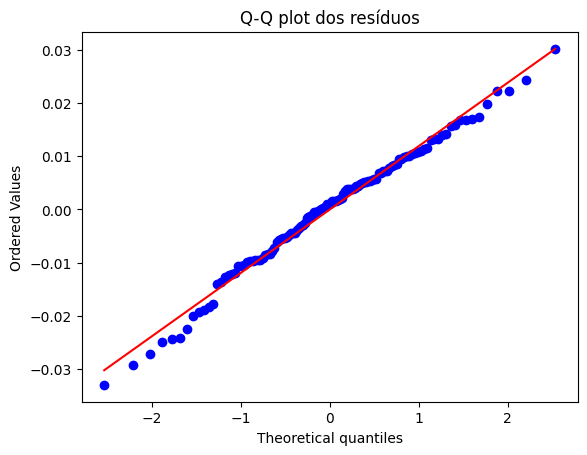

In [40]:
import scipy.stats as stats

plt.hist(residuos, bins=20, edgecolor='k')
plt.title('Histograma dos resíduos')
plt.show()
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q plot dos resíduos')
plt.show()

In [ ]:
bins = pd.cut(Y_pred, bins=5)  

# Aplique o teste de Levene para verificar a homoscedasticidade
stat, p_value = stats.levene(
    *[residuos[bins == bin] for bin in bins.unique()] 
)

# Exibe os resultados
print(f"Estatística do teste de Levene: {stat}")
print(f"Valor-p: {p_value}")

Estatística do teste de Levene: 0.7229749799538226
Valor-p: 0.5779328352428585
